# Predicting Heart-disease using Machine Learning:

Building an ML model capable of predicting whether or not someone has a heart disease based on their medical attributes.

Steps:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition:

>Given clinical parameters of a patient , can we predict whether or not they have a heart disease.

## 2. Data:

The original data came from the Cleaveland database from the UCI MAchine Learning Repository (Kaggle) - https://archive.ics.uci.edu/dataset/45/heart+disease

There was a version in Kaggle - 
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download

## 3. Evaluation:

>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept , we'll pursue with the project.

## 4. Features:
**Create a data dictionary:**
1. **age**: Age in years  
2. **sex**: Sex (1 = male; 0 = female)  
3. **cp**: Chest pain type  
   - Value 0: typical angina  
   - Value 1: atypical angina  
   - Value 2: non-anginal pain  
   - Value 3: asymptomatic  
4. **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)  
5. **chol**: Serum cholesterol in mg/dl  
6. **fbs**: (Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
7. **restecg**: Resting electrocardiographic results  
   - Value 0: normal  
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
8. **thalach**: Maximum heart rate achieved  
9. **exang**: Exercise induced angina (1 = yes; 0 = no)  
10. **oldpeak**: ST depression induced by exercise relative to rest  
11. **slope**: The slope of the peak exercise ST segment  
    - Value 0: upsloping  
    - Value 1: flat  
    - Value 2: downsloping  
12. **ca**: Number of major vessels (0-3) colored by fluoroscopy  
13. **thal**: 0 = normal; 1 = fixed defect; 2 = reversible defect  
14. **condition**: Label (0 = no isease, 1 = disease)  
atic no disease, 1 = disease

## Prepare the tools:

We will use pandas , numpy & matplotlib for EDA(exploratory data analysis) and manipulation.

In [1]:
# Import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for the plots to appear inside the notebook
%matplotlib inline 

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import  RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix  , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data:

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

## Data exploration (EDA)

Here we try to find out more about the data we are working with. 
Approach:
1. What question(s) are we trying to solve?
2. What kind of data do we have & how do we treat different types?
3. What's missing from the data & how do u deal with it?
4. Where are the outliers?
5. How can we add,change or remove the features to get more out of the data?

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# To find out how many  of each class is there in "target"
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

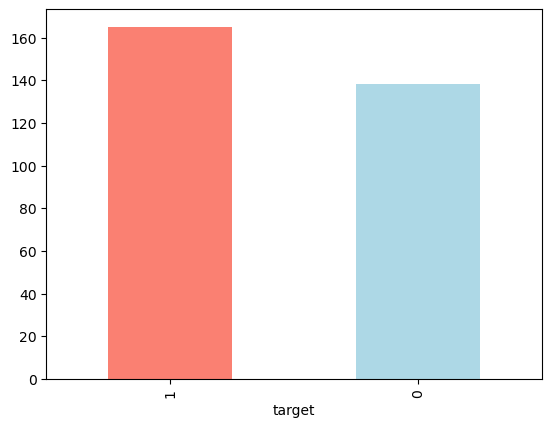

In [4]:
df["target"].value_counts().plot(kind = "bar" , color = ["salmon","lightblue"]);

In [6]:
# To see if there are any missing values
df.isna().sum()   # Therefore no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
## Heart disease frequency according to Sex
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
# Compare 'target' column with 'sex' column
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


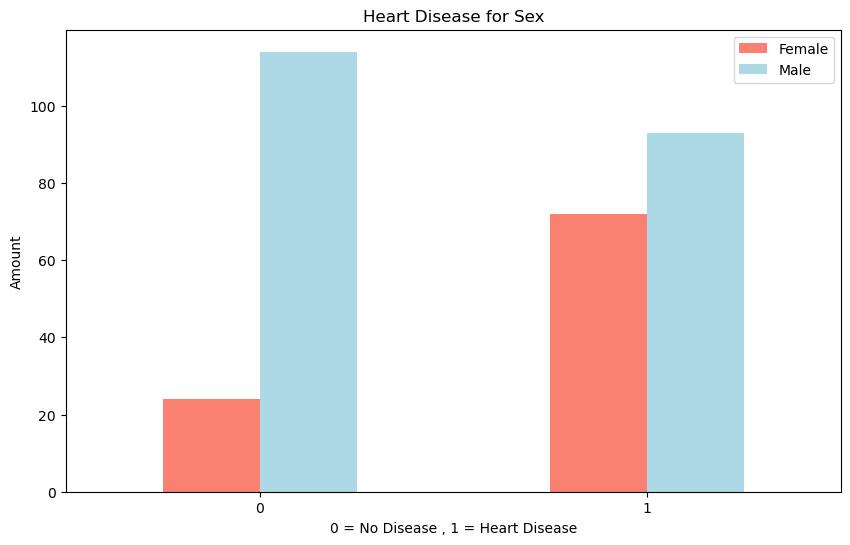

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target , df.sex).plot(kind = "bar", figsize=(10,6) , color=["salmon","lightblue"])
plt.title("Heart Disease for Sex")
plt.xlabel("0 = No Disease , 1 = Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);  # For '0' & '1' in x-axis to be represented horizontally

### Age vs thalach (Max Heart Rate) for Heart Disease

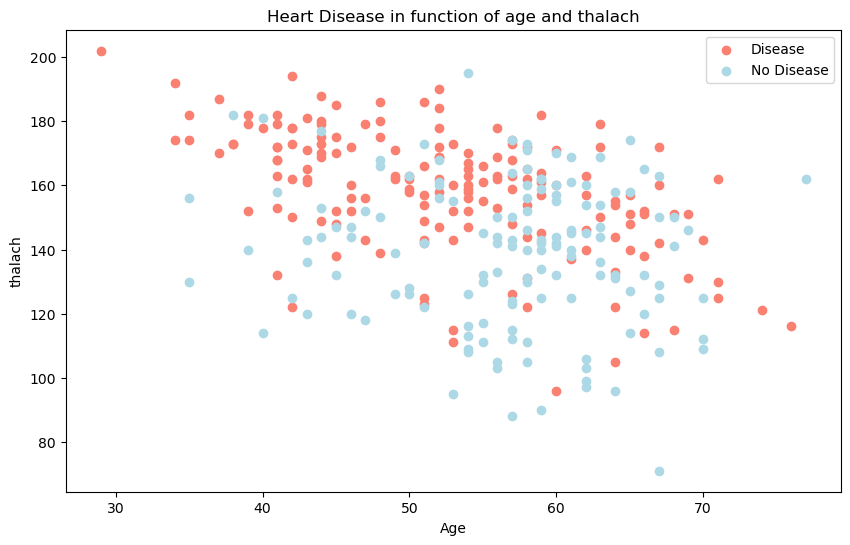

In [12]:
# Create another figure
plt.figure(figsize = (10,6))

# Scatter plot with positive examples
plt.scatter(df.age[df.target == 1] , df.thalach[df.target == 1] , c = "salmon")

# Scatter plot with negative examples
plt.scatter(df.age[df.target == 0] , df.thalach[df.target == 0] , c = "lightblue")

plt.title("Heart Disease in function of age and thalach")
plt.xlabel("Age")
plt.ylabel("thalach")
plt.legend(["Disease","No Disease"]);

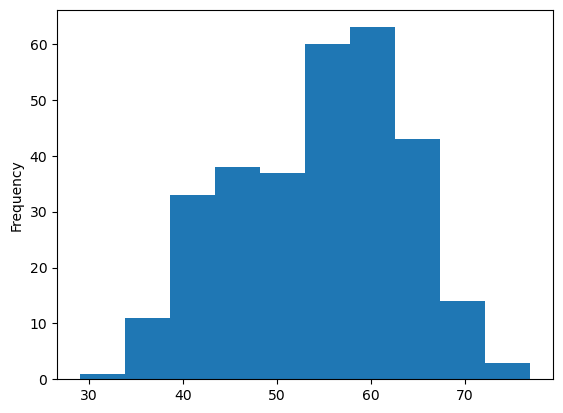

In [12]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Comparing Chest Pain (cp) with Heart Disease
cp: Chest pain type
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic

In [13]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


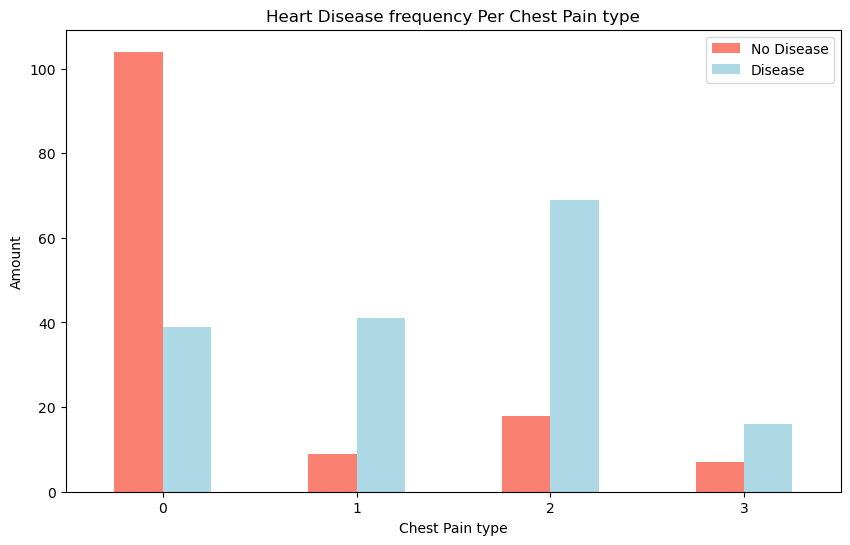

In [56]:
# Make the crosstab more visual
pd.crosstab(df.cp , df.target).plot(kind = "bar", figsize=(10,6) , color=["salmon","lightblue"])
plt.title("Heart Disease frequency Per Chest Pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [57]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


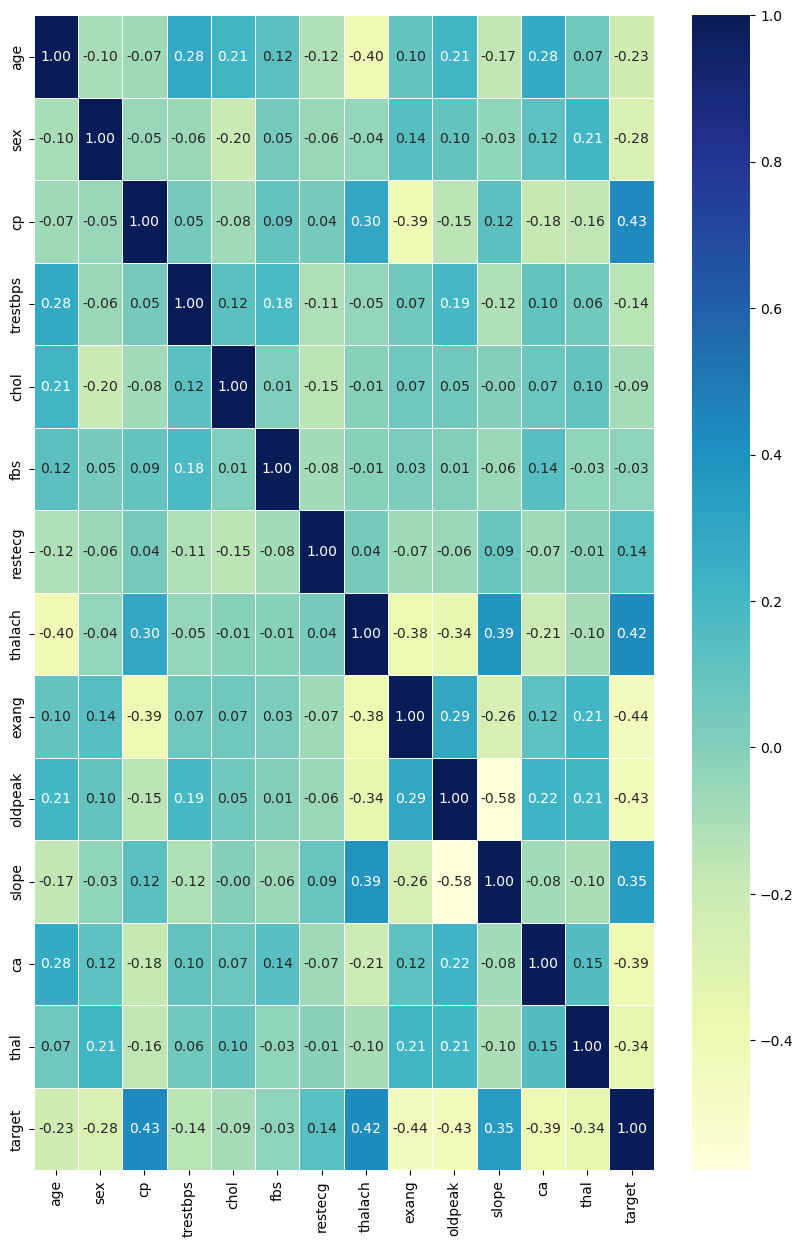

In [58]:
# Visualizing the correlation matrix
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (10,15))
ax = sns.heatmap(corr_matrix , annot = True , linewidths = 0.5 , fmt = ".2f" , cmap = "YlGnBu");

## 5. Modelling

We will try 3 ML models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Clssifier

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Split the data into X and y
X = df.drop("target" , axis = 1)
y = df["target"]

# Split the data into train and test sets 
np.random.seed(42) # To reproduce the results
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2)

In [4]:
# Put the models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score( models , X_train , X_test , y_train , y_test):
    """
    Fits and trains the given ML models.
    models : a dict of different sklearn ML models
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name ,model in models.items():
        # Fit the model to the data
        model.fit( X_train , y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score( X_test , y_test)
    return model_scores

In [5]:
model_scores = fit_and_score( models=models , X_train=X_train , X_test=X_test , y_train=y_train , y_test=y_test)
model_scores

C:\Users\shris\heart-disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

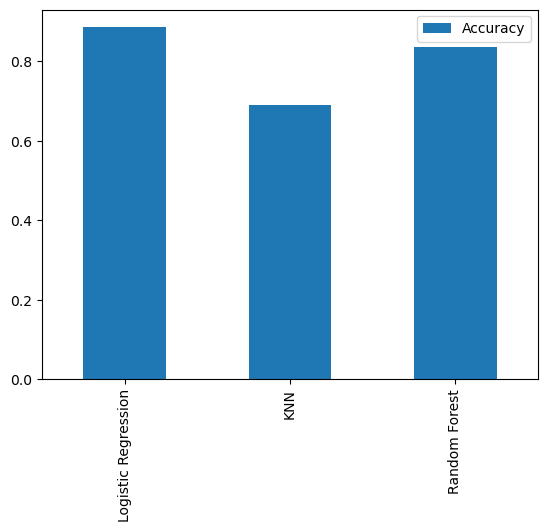

In [6]:
model_compare = pd.DataFrame( model_scores , index = ["Accuracy"])
model_compare.T.plot.bar();

What we got was the baseline score of the models. Therefore,  we have to tune them to get better results .

Things to look at:
* Hyperparameter tuning
* Feature importance
* Confusion_matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* AUC

### Hyperparameter Tuning (by hand):

In [6]:
# Tuning the KNN model
train_scores = []
test_scores = []

# Create a list of different values of n_neighbors
neighbors = range(1,21)

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors 
for i in neighbors:
    knn.set_params( n_neighbors = i)   # 'set_params' is used to change the value of a parameter in the model
    knn.fit( X_train , y_train)
    # Update the training scores list
    train_scores.append( knn.score( X_train , y_train))
    # Update the test scores list
    test_scores.append( knn.score( X_test , y_test))

In [38]:
train_scores  

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [39]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41% 


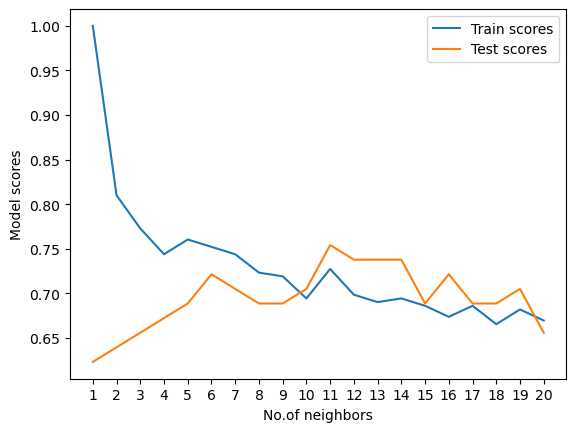

In [8]:
plt.plot( neighbors , train_scores , label = "Train scores")
plt.plot( neighbors , test_scores , label = "Test scores")
plt.xticks( np.arange(1,21,1))   # To display all the values of the neighbors on the x-axis
plt.xlabel("No.of neighbors")
plt.ylabel("Model scores")
plt.legend()

print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}% ")

### Hyperparameter tuning with RandomizedSearchCV:

We will be tuning LogisticRegression() and RandomForestClassifier() with RandomizedSearchCV.

In [7]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20), 
    "solver": ["liblinear"]
}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegresssion
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20, 
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegresssion
rs_log_reg.fit(X_train, y_train)
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [10]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [8]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20, 
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegresssion
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [12]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [14]:
# Evaluating 
rs_rf.score(X_test, y_test)   # Therfore an improvement

0.8688524590163934

In [15]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyperparameter tuning with GridSearchCV:

* Since the LogisticRegression model gives the best scores so far , we will try and improve using GridSearchCV.

In [8]:
# Different hyperparameters for the LogisticRegression model
log_reg_grid = {
    "C": np.logspace(-4, 4, 30), 
    "solver": ["liblinear"]
}
# Setup grid hyperparameter search for LogisticRegresssion
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)
# Fit grid hyperparameter search model for LogisticRegresssion
gs_log_reg.fit(X_train, y_train)
gs_log_reg.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [11]:
# Evaluate the GridSearch LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

#### Evaluating the tuned ML classifier , beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

Also using Cross-validation wherever possible.

To make comparisons and evaluate the model , we first need to make predictions.

In [9]:
# Make predictions with the trained model
y_preds = gs_log_reg.predict( X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [14]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

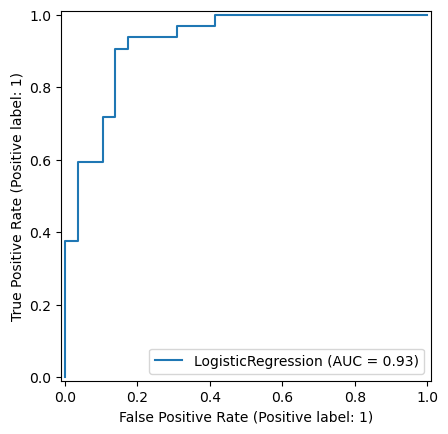

In [28]:
# Plot ROC curve(a plot btw True Positives and False Positves) and calculate AUC score
RocCurveDisplay.from_estimator(
    gs_log_reg.best_estimator_, # Best model from GridSearchCV
    X_test,      
    # Test data features
    y_test                      # True labels for the test data
);

In [29]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


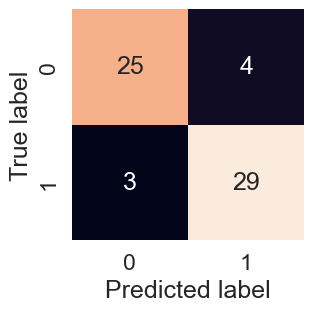

In [31]:
# Visualize the Confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test , y_preds):
    """
    Plotting a confusion matrix using Seaborn's heatmap.
    """
    fig,ax = plt.subplots( figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [32]:
# Getting a Classification report as well as cross-validated precision , recall and f1 score
print( classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate the evaluation metrics by cross-validation(accuracy , precision , recall , F1 score) using 'cross_val_score'

In [34]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [10]:
# Create a new classifier with the best parameters
clf = LogisticRegression( C = 0.20433597178569418 , solver = "liblinear")

In [12]:
# Cross-validated accuracy:
cv_acc = cross_val_score( clf , X , y , cv = 5 , scoring = "accuracy")
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [14]:
# Cross-validated precision:
cv_precision = cross_val_score( clf , X , y , cv = 5 , scoring = "precision")
cv_precision = cv_precision.mean()
cv_precision

0.8207936507936507

In [15]:
# Cross-validated recall:
cv_recall = cross_val_score( clf , X , y , cv = 5 , scoring = "recall")
cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [16]:
# Cross-validated f1-score:
cv_f1 = cross_val_score( clf , X , y , cv = 5 , scoring = "f1")
cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

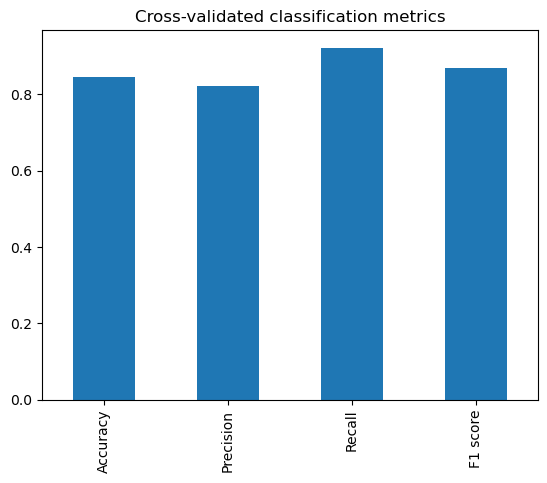

In [17]:
# Visualize the cross-validated metrics 
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1 score": cv_f1},
                         index = [0])
cv_metrics.T.plot.bar( title = "Cross-validated classification metrics" , legend = False);

### Feature Importance:
* Which features contributed most to the outcomes of the model and how did they contribute?
* Finding feature importance is different for each ML model.
* 1 way to find 'Feature Importance' is to search for "(MODEL NAME) feature importance".

In [18]:
# Fit an instance of LogisticRegression
clf = LogisticRegression( C = 0.20433597178569418 , solver = "liblinear")
clf.fit( X_train , y_train)

# Check _coef
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [19]:
# Match coef_'s features to columns
feature_dict = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

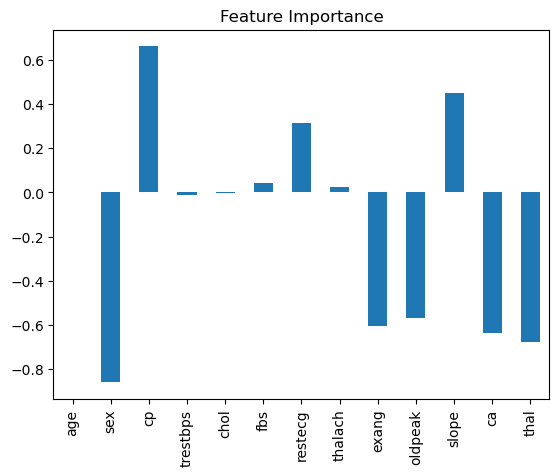

In [32]:
# Visualize the feature importance
feature_df = pd.DataFrame( feature_dict , index = [0])
feature_df.T.plot.bar( title = "Feature Importance" , legend = False);

## 6. Evaluation:

If we haven't reached our evaluation metric yet then think about:
* Collecting more data
* Trying a better model , using CatBoost or XGBoost
* If the model is good enough (the evaluation metric has been reached) , how to export it?

In [20]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
